<a href="https://colab.research.google.com/github/davidmarip/DS2002-FINAL-PROJECT/blob/main/DS2002-FINAL-PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Install required libraries for google cloud storage
!pip install --upgrade google-cloud-storage

In [23]:
# Import libraries
import csv
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import random

# Import Google Cloud Storage library
from google.cloud import storage
import os


In [24]:
# Authenticate and initialize the GCS client

from google.colab import auth
auth.authenticate_user() #works via google accounts, you have to sign in

client = storage.Client()


def upload_to_gcs(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to Google Cloud Storage."""
    bucket = client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)
    blob.upload_from_filename(source_file_name)
    print(f"File {source_file_name} uploaded to {bucket_name}/{destination_blob_name}.")

def download_from_gcs(bucket_name, source_blob_name, destination_file_name):
    """Downloads a file from Google Cloud Storage."""
    bucket = client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)
    print(f"File {source_blob_name} downloaded from {bucket_name} to {destination_file_name}.")



In [25]:
import csv
import pandas as pd

#reading the 'covid' CSV file
def read_file(file_name):
  if file_name.endswith('.csv'):
    df = pd.read_csv(file_name, encoding='latin-1')
    return df
  else:
    raise ValueError("Unsupported file format.")

user_input = input("Enter file name: ")
df1 = read_file(user_input)
print(df1.head())

Enter file name: covid.csv
   Data as of  Start Date    End Date State                   County Name  \
0  09/27/2023  01/01/2020  09/23/2023    AK        Anchorage Municipality   
1  09/27/2023  01/01/2020  09/23/2023    AK        Anchorage Municipality   
2  09/27/2023  01/01/2020  09/23/2023    AK        Anchorage Municipality   
3  09/27/2023  01/01/2020  09/23/2023    AK  Fairbanks North Star Borough   
4  09/27/2023  01/01/2020  09/23/2023    AK  Fairbanks North Star Borough   

   Urban Rural Code  FIPS State  FIPS County  FIPS Code  \
0                 3           2           20       2020   
1                 3           2           20       2020   
2                 3           2           20       2020   
3                 4           2           90       2090   
4                 4           2           90       2090   

                              Indicator  ...  COVID-19 Deaths  \
0  Distribution of all-cause deaths (%)  ...              787   
1   Distribution of COVID

In [26]:
#Renaming all of the items in the 'State' column to show the full name rather than the state abbreviation
df1 = df1[['State', 'County Name', 'COVID-19 Deaths']]
df1 = df1.rename(columns={'County Name': 'County'})
df1_cleaned = df1.drop_duplicates()
abbreviation_to_state = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}
df1_cleaned.loc[:, 'State'] = df1_cleaned['State'].map(abbreviation_to_state)
df1_cleaned.sort_values(by=['County']).head(10)

,State,County,COVID-19 Deaths
1203,Louisiana,Acadia Parish,169
3291,Virginia,Accomack County,103
753,Idaho,Ada County,1719
2625,Pennsylvania,Adams County,324
327,Colorado,Adams County,1766
2313,Ohio,Adams County,104
1992,Nebraska,Adams County,129
1677,Mississippi,Adams County,170
777,Illinois,Adams County,454
2799,South Carolina,Aiken County,502


In [27]:
import csv
import pandas as pd

#Reading the 'population' CSV file
def read_file(file_name):
  if file_name.endswith('.csv'):
    df = pd.read_csv(file_name, encoding='latin-1')
    return df
  else:
    raise ValueError("Unsupported file format.")

user_input = input("Enter file name: ")
df2 = read_file(user_input)
print(df2.head())

Enter file name: population.csv
  table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts)  \
0  Annual Estimates of the Resident Population fo...                                                            
1                                    Geographic Area                                                            
2                                             County                                                            
3                                    .Autauga County                                                            
4                                    .Baldwin County                                                            

                     Unnamed: 1                          Unnamed: 2  \
0                           NaN                                 NaN   
1  April 1, 2020 Estimates Base  Population Estimate (as of July 1)   
2                         State                                2020   
3    

In [28]:
# Reloading the file, skipping initial rows to extract meaningful data
df2 = pd.read_csv('population.csv', skiprows=3, encoding='latin-1')

# Renaming the columns for clarity
df2.columns = ['County','State', 'Population 2020', 'Population 2021',
                      'Population 2022', 'Population 2023']

# Selecting the relevant columns: County and Population Estimate for 2020
df2 = df2[['County', 'State', 'Population 2020']]
df2.loc[:, 'County'] = df2['County'].str.replace('.', '', regex=False)
df2.loc[:, 'Population 2020'] = df2['Population 2020'].str.replace(',', '', regex=False)

df2 = df2[['State', 'County', 'Population 2020']]
df2.sort_values(by=['County']).head(10)


,State,County,Population 2020
2318,South Carolina,Abbeville County,24266
1115,Louisiana,Acadia Parish,57478
2822,Virginia,Accomack County,33392
553,Idaho,Ada County,498278
1485,Missouri,Adair County,25268
995,Kentucky,Adair County,18883
2133,Oklahoma,Adair County,19456
791,Iowa,Adair County,7493
792,Iowa,Adams County,3709
2246,Pennsylvania,Adams County,103798


In [29]:
#Cleaning the population and covid dataframes
df1_cleaned.loc[:, 'State'] = df1_cleaned['State'].str.strip()
df1_cleaned.loc[:, 'County'] = df1_cleaned['County'].str.strip()
df2['State'] = df2['State'].str.strip()
df2['County'] = df2['County'].str.strip()

# Merge on the cleaned county names
merged_df = pd.merge(df1_cleaned, df2, on=['County','State'], how='outer')

merged_df.sort_values(by=['County']).head(15)



,State,County,COVID-19 Deaths,Population 2020
0,South Carolina,Abbeville County,NaN,24266
1,Louisiana,Acadia Parish,169.0,57478
2,Virginia,Accomack County,103.0,33392
3,Idaho,Ada County,1719.0,498278
4,Iowa,Adair County,NaN,7493
5,Kentucky,Adair County,NaN,18883
6,Missouri,Adair County,NaN,25268
7,Oklahoma,Adair County,NaN,19456
19,Wisconsin,Adams County,NaN,20677
18,Washington,Adams County,NaN,20607


In [30]:
#Checking the types of items in the columns
print(merged_df.dtypes)

State               object
County              object
COVID-19 Deaths    float64
Population 2020     object
dtype: object


In [31]:
#Checking for columns with null values
merged_df.isnull().any()

,0
State,True
County,False
COVID-19 Deaths,True
Population 2020,True


In [32]:
#Dropping null and duplicate values from the merged dataframe
merged_df = merged_df.dropna()
merged_df = merged_df.drop_duplicates()
print(merged_df)

               State           County  COVID-19 Deaths Population 2020
1          Louisiana    Acadia Parish            169.0           57478
2           Virginia  Accomack County            103.0           33392
3              Idaho       Ada County           1719.0          498278
8           Colorado     Adams County           1766.0          520500
10          Illinois     Adams County            454.0           65614
...              ...              ...              ...             ...
3168    Pennsylvania      York County           1677.0          456720
3169  South Carolina      York County            790.0          284028
3170        Virginia      York County            159.0           70232
3172      California      Yuba County            316.0           81958
3174         Arizona      Yuma County           1180.0          205659

[1200 rows x 4 columns]


In [33]:
# Convert the necessary columns to numeric before performing the calculation
merged_df["COVID-19 Deaths"] = pd.to_numeric(merged_df["COVID-19 Deaths"])
merged_df["Population 2020"] = pd.to_numeric(merged_df["Population 2020"])

#Calculate 'Death per 100,000'
merged_df["Death per 100,000"] = (merged_df["COVID-19 Deaths"] / merged_df["Population 2020"]) * 100000
merged_df.sort_values(by=['Death per 100,000'], ascending=False).head(20)

,State,County,COVID-19 Deaths,Population 2020,"Death per 100,000"
2002,Pennsylvania,Montour County,877.0,18131,4837.019469
1836,Virginia,Martinsville city,329.0,13474,2441.739647
3108,Virginia,Winchester city,676.0,28013,2413.165316
1009,Virginia,Galax city,125.0,6715,1861.504095
2503,Virginia,Salem city,428.0,25403,1684.840373
2243,Kentucky,Perry County,467.0,28367,1646.279127
2082,Missouri,Newton County,898.0,58692,1530.021127
987,Virginia,Fredericksburg city,408.0,27991,1457.611375
2336,Texas,Potter County,1706.0,118275,1442.401184
1776,Tennessee,Madison County,1419.0,98832,1435.769791


In [35]:
import csv
import pandas as pd

#Reading the 'aqi_2020' CSV file
def read_file(file_name):
  if file_name.endswith('.csv'):
    df = pd.read_csv(file_name)
    return df
  else:
    raise ValueError("Unsupported file format.")

user_input = input("Enter file name: ")
df3 = read_file(user_input)
print(df3.head())

Enter file name: aqi_2020.csv
     State   County  Year  Days with AQI  Good Days  Moderate Days  \
0  Alabama  Baldwin  2020            269        223             46   
1  Alabama     Clay  2020            105         83             22   
2  Alabama   DeKalb  2020            364        332             32   
3  Alabama   Elmore  2020            197        197              0   
4  Alabama   Etowah  2020            276        239             37   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                    0               0                    0   
1                                    0               0                    0   
2                                    0               0                    0   
3                                    0               0                    0   
4                                    0               0                    0   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0 

In [36]:
#Drop columns other than the state, county, and median aqi
df3_cleaned = df3[['State', 'County', 'Median AQI']]
df3_cleaned = df3_cleaned[df3_cleaned['State'] != 'Country Of Mexico']
df3_cleaned.sort_values(by=['Median AQI'], ascending=False).head(20)

,State,County,Median AQI
29,Arizona,Maricopa,112
80,California,San Bernardino,93
77,California,Riverside,87
64,California,Los Angeles,85
61,California,Kern,83
97,California,Tulare,80
56,California,Fresno,76
81,California,San Diego,74
33,Arizona,Pinal,73
62,California,Kings,70


In [37]:
import pandas as pd

#Remove the name 'County' from any counties in the aqi dataframe
merged_df['County'] = merged_df['County'].str.replace(' County', '', regex=False)

#Cleaning the merged dataframe and aqi dataframe to remove unnecessary spaces
merged_df['County'] = merged_df['County'].str.strip()
df3_cleaned['County'] = df3_cleaned['County'].str.strip()
merged_df['State'] = merged_df['State'].str.strip()
df3_cleaned['State'] = df3_cleaned['State'].str.strip()

#Add the Median AQI column to the merged dataframe and drop unnecessary columns
final_df = pd.merge(merged_df, df3_cleaned, on=['County', 'State'], how='inner')
final_df = final_df[['State', 'County', 'Death per 100,000', 'Median AQI']]
final_df.sort_values(by=['Death per 100,000'], ascending=False)

# Save the transformed DataFrame to CSV
final_df.to_csv('transformed_data.csv', index=False)

# Upload the CSV file to Google Cloud Storage
bucket_name = 'ds2002-final-project-bucket'
upload_to_gcs(bucket_name, 'transformed_data.csv', 'transformed_data.csv')

# Create an SQLite database connection
conn = sqlite3.connect('final_data.db')

# Save DataFrame to SQLite
final_df.to_sql('cleaned_dataframe', conn, if_exists='replace', index=False)
conn.commit()

print('DataFrame converted and saved to SQLite as cleaned_dataframe')

File transformed_data.csv uploaded to ds2002-final-project-bucket/transformed_data.csv.
DataFrame converted and saved to SQLite as cleaned_dataframe


In [38]:
import sqlite3
import pandas as pd

#Create an SQLite database connection
conn = sqlite3.connect('final_data.db')

#Save DataFrame to SQLite
final_df.to_sql('cleaned_dataframe', conn, if_exists='replace', index=False)
conn.commit()

print('DataFrame converted and saved to SQLite as cleaned_dataframe')

#Query to confirm that data was saved in dataframe
query = "SELECT * FROM cleaned_dataframe"
final_df_from_sql = pd.read_sql(query, conn)
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM cleaned_dataframe")
row_count = cursor.fetchone()[0]
# Print row count to confirm all rows were saved
print(f"Number of rows in the 'cleaned_dataframe' table: {row_count}")

#Display the DataFrame
print(final_df_from_sql.head(10))  # Display the first 10 rows

#Close the connection
conn.close()

DataFrame converted and saved to SQLite as cleaned_dataframe
Number of rows in the 'cleaned_dataframe' table: 659
            State     County  Death per 100,000  Median AQI
0           Idaho        Ada         344.988139          44
1        Colorado      Adams         339.289145          49
2        Illinois      Adams         691.925504          38
3            Ohio      Adams         379.008746          39
4    Pennsylvania      Adams         312.144743          42
5  South Carolina      Aiken         296.746430          32
6         Florida    Alachua         606.283759          42
7      California    Alameda         156.385193          52
8        New York     Albany         407.301492          42
9        Virginia  Albemarle         233.756999          41


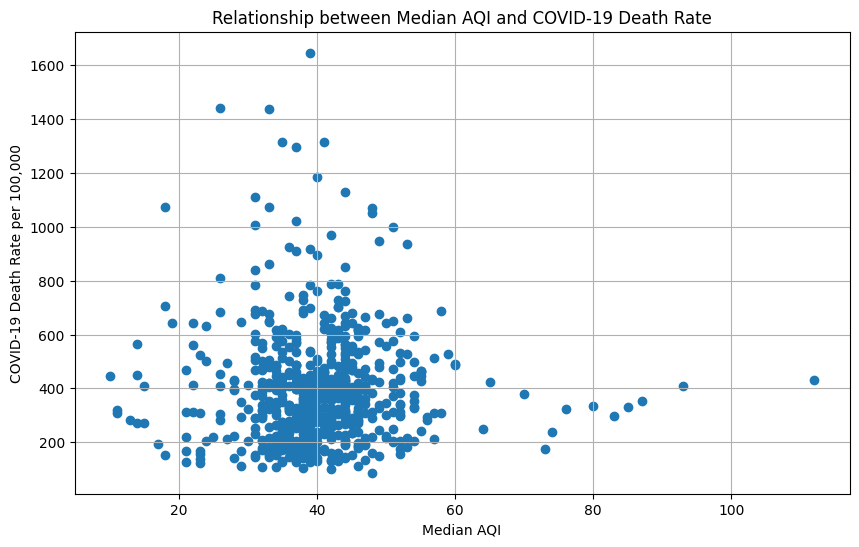

In [39]:
import matplotlib.pyplot as plt

# Create the scatter plot to examine the relationship between Median AQI and COVID-19 Death Rate
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Median AQI'], final_df['Death per 100,000'])
plt.xlabel('Median AQI')
plt.ylabel('COVID-19 Death Rate per 100,000')
plt.title('Relationship between Median AQI and COVID-19 Death Rate')
plt.grid(True)
plt.show()

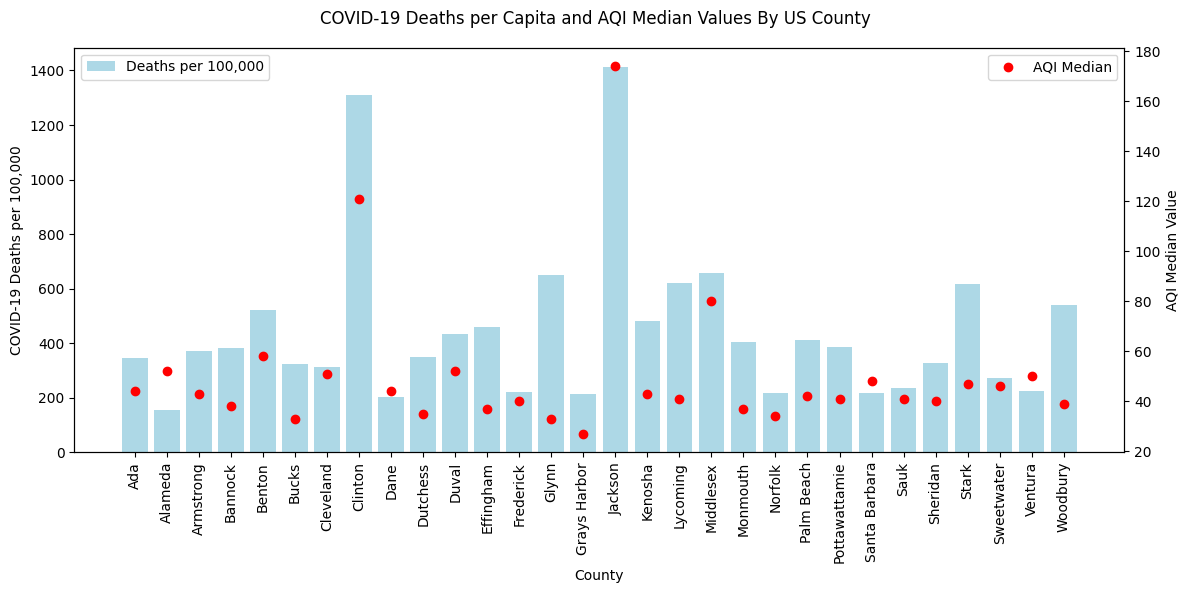

In [40]:
import matplotlib.pyplot as plt
import random

#Randomly select 30 counties from the transformed dataframe
unique_counties = final_df['County'].unique()
selected_counties = random.sample(list(unique_counties), 30)
filtered_df = final_df[final_df['County'].isin(selected_counties)]

#Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))
deathsVScounty = filtered_df.groupby('County')['Death per 100,000'].sum().reset_index()
medianaqiVScounty = filtered_df.groupby('County')['Median AQI'].sum().reset_index()

ax1.bar(deathsVScounty['County'].tolist(), deathsVScounty['Death per 100,000'].tolist(), color='lightblue', label='Deaths per 100,000')
ax1.set_xlabel("County")
ax1.set_ylabel("COVID-19 Deaths per 100,000")
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
# Use the 'Median AQI' column for y-coordinates instead of a fixed range
ax2.scatter(medianaqiVScounty['County'].tolist(), medianaqiVScounty['Median AQI'].tolist(), color='red', label='AQI Median', zorder=5)
ax2.set_ylabel("AQI Median Value", rotation=90)

fig.suptitle("COVID-19 Deaths per Capita and AQI Median Values By US County")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [41]:
import pandas as pd

#Calculate the Pearson correlation coefficient
correlation = final_df['Death per 100,000'].corr(final_df['Median AQI'])

print(f"The Pearson correlation coefficient is: {correlation}")

The Pearson correlation coefficient is: -0.0008293326190147323


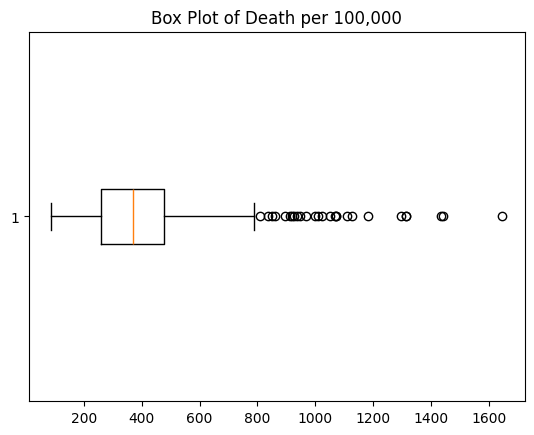

Outliers:
              State      County  Death per 100,000  Median AQI
13             Ohio       Allen         894.981640          40
64            Texas       Bowie        1051.408155          48
65         Kentucky        Boyd        1315.188981          41
72    West Virginia      Brooke        1072.254850          18
82    West Virginia      Cabell         911.502547          37
175         Georgia   Dougherty         947.683636          49
209  South Carolina    Florence        1022.533749          37
210         Georgia       Floyd         969.741233          42
214     Mississippi     Forrest        1069.204108          48
245           Texas       Gregg        1008.442588          31
248         Georgia        Hall         849.744192          44
272     Mississippi       Hinds         936.211496          53
341     Mississippi  Lauderdale        1109.047128          31
347     Mississippi         Lee        1312.962807          35
364           Texas     Lubbock         808.7

In [42]:
import matplotlib.pyplot as plt

#Create a box plot of Death per 100,000
plt.boxplot(final_df['Death per 100,000'], vert=False)
plt.title('Box Plot of Death per 100,000')
plt.show()
Q1 = final_df['Death per 100,000'].quantile(0.25)
Q3 = final_df['Death per 100,000'].quantile(0.75)
IQR = Q3 - Q1

#Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Get the outliers
outliers = final_df[(final_df['Death per 100,000'] < lower_bound) | (final_df['Death per 100,000'] > upper_bound)]

print("Outliers:")
print(outliers)

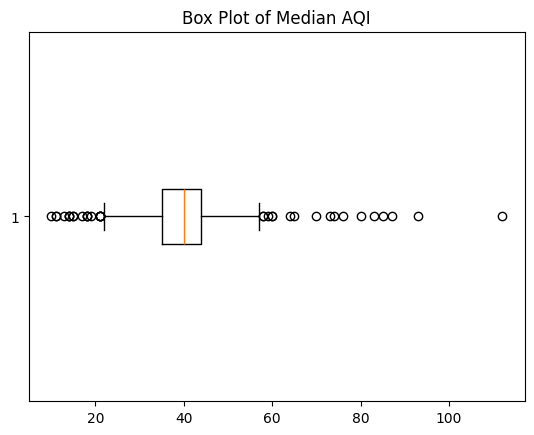

Outliers for AQI:
             State          County  Death per 100,000  Median AQI
20         Arizona          Apache         270.052949          14
40            Ohio         Belmont         283.593797          13
72   West Virginia          Brooke        1072.254850          18
102           Iowa     Cerro Gordo         704.290828          18
122         Nevada           Clark         422.878147          65
142           Ohio      Columbiana         446.665748          10
145       Illinois            Cook         308.685601          58
147     Washington         Cowlitz         310.771614          21
193          Texas         El Paso         528.498533          59
213         Kansas            Ford         309.805641          11
219     Washington        Franklin         153.371076          18
221       Colorado         Fremont         319.161995          11
223     California          Fresno         324.698480          76
236     Washington           Grant         168.944399     

In [43]:
#Create a box plot of Median AQI values
plt.boxplot(final_df['Median AQI'], vert=False)
plt.title('Box Plot of Median AQI')
plt.show()
Q1_aqi = final_df['Median AQI'].quantile(0.25)
Q3_aqi = final_df['Median AQI'].quantile(0.75)
IQR_aqi = Q3_aqi - Q1_aqi

#Define outliers for AQI
lower_bound_aqi = Q1_aqi - 1.5 * IQR_aqi
upper_bound_aqi = Q3_aqi + 1.5 * IQR_aqi

#Get outliers for AQI
outliers_aqi = final_df[(final_df['Median AQI'] < lower_bound_aqi) | (final_df['Median AQI'] > upper_bound_aqi)]

print("Outliers for AQI:")
print(outliers_aqi)

Summary of Findings: Based on our visualizations, there is not a strong linear correlation between Covid-19 death rate and median AQI across various US counties. The scatterplot shows that the median AQI and death rate for most US counties fall into a relatively narrow range of an AQI between 30-50 and a death rate between 100-600 shown by the high concentration of datapoints in that region. There are some datapoints to the right of the scatterplot that have low deathrates with high median AQIs as well as points with very high death rates and low median AQIs. Boxplots were created to investigate possible outliers. Both the AQI data and the Cvid-19 datasets had outliers. In that vein, there are many other factors that affect death rate that are not captured by median AQI that could be controlled for in further analysis to investigate the relationship between AQI and Covid-19 death rate in a more targetted manner. The bargraph overlapped with the scatter plot also does not show a strong linear trend. Visually, it seems like there could be some sort of correlation initially, but the datapoints of the scatterplot representing median AQI do not line up with the bars for death rate consistently. To confirm that there is not a positive linear correlation between the two variables, the correlation coefficient was calculated. The Pearson correlation coefficient confirmed that there is not a correlation from the datasets that we used. A strong positive correlation would have indicated that higher median AQI (worse air) was correlated with a higher Covid-19 death rate (more deaths). This does not mean that we can conclude that there is no correlation. It is possible that there could be a correlation when other factors that affect Covid-19 death rate are controlled or if the n-value is increased to include more areas.